In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# pip install xgboost

In [4]:
path = r"Churn_Modelling.csv"
df= pd.read_csv(path)

In [53]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
# Removing Columns we wont need
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1,inplace=True)

In [55]:
df.shape

(10000, 11)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [59]:
# Looking out for Null Values
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [57]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [51]:
# df.nunique().sort_values(ascending=False)

In [8]:
# Displaying the column names of the dataset
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [5]:
# plt.pie(df['Exited'].value_counts(), autopct='%1.1f%%')
# label = ('Remain')
# plt.legend(label)
# plt.title('WHo Left?');

### Exploratory Data Analysis

#### Univariate Analysis

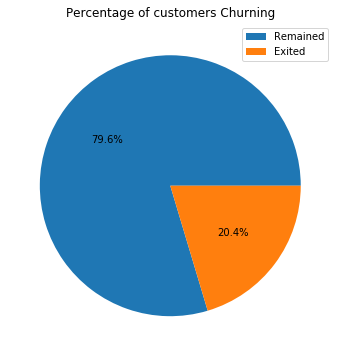

In [60]:
#Pie chart showing Percentage of Churning Customers
plt.figure(figsize=(12,6))
plt.pie(df['Exited'].value_counts(), autopct='%1.1f%%')
label = ('Remained', 'Exited')
plt.legend(label)
plt.title('Percentage of customers Churning');

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

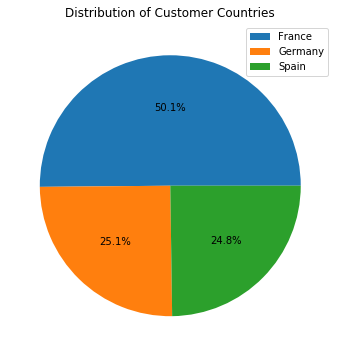

In [105]:
# Viz showing countries of customers
labels = ('France','Germany', 'Spain')
plt.figure(figsize=(12,6))
plt.pie(df['Geography'].value_counts(), autopct='%1.1f%%')
plt.title('Distribution of Customer Countries')
plt.legend(labels);
df['Geography'].value_counts()

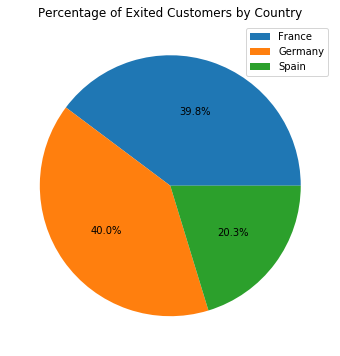

In [63]:
#Percentage of Exited customers from countries
france=df.loc[df['Geography']=='France'].loc[df['Exited']==1].count()[0]
germany=df.loc[df['Geography']=='Germany'].loc[df['Exited']==1].count()[0]
spain=df.loc[df['Geography']=='Spain'].loc[df['Exited']==1].count()[0]

labels = ('France','Germany', 'Spain')
plt.figure(figsize=(12,6))
plt.pie((france,germany,spain), autopct='%1.1f%%')
plt.title('Percentage of Exited Customers by Country')
plt.legend(labels);

**Germany has 40% of Exited customers the most, dispite having 25% of the total sample**

Male      5457
Female    4543
Name: Gender, dtype: int64

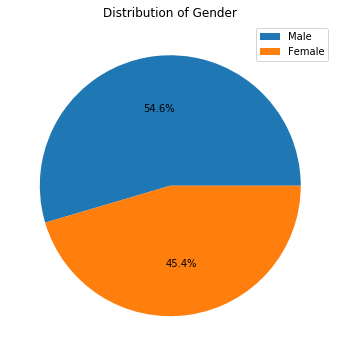

In [164]:
# Pie chart of Gender of Customer
labels = ('Male','Female')
plt.figure(figsize=(12,6))
plt.pie(df['Gender'].value_counts(), autopct='%1.1f%%')
plt.title('Distribution of Gender')
plt.legend(labels);
df['Gender'].value_counts()

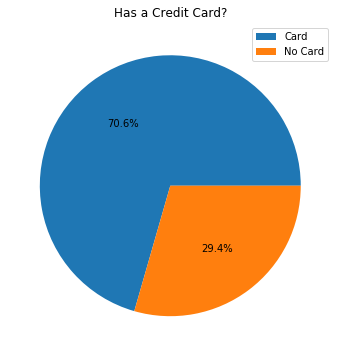

In [92]:
plt.figure(figsize=(12,6))
labels=('Card', 'No Card')
plt.pie(df['HasCrCard'].value_counts(), autopct='%1.1f%%')
plt.legend(labels)
plt.title('Has a Credit Card?');

In [84]:
# df.loc[df['Exited']==1].loc[df['Gender']=='Female'].count()
# df.head()
# sns.barplot(data=df, y ='Exited', x = 'Gender');

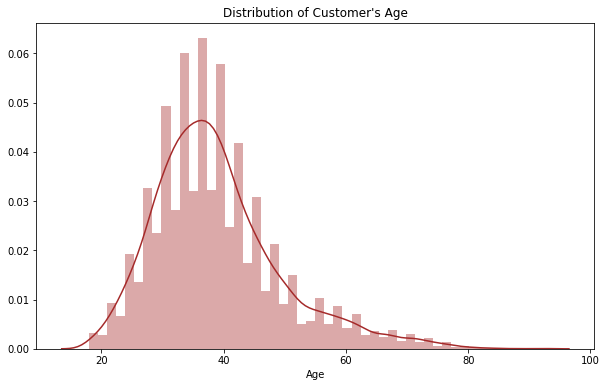

In [62]:
plt.figure(figsize=(10,6))
sns.distplot(df['Age'], color='brown')
plt.title("Distribution of Customer's Age");

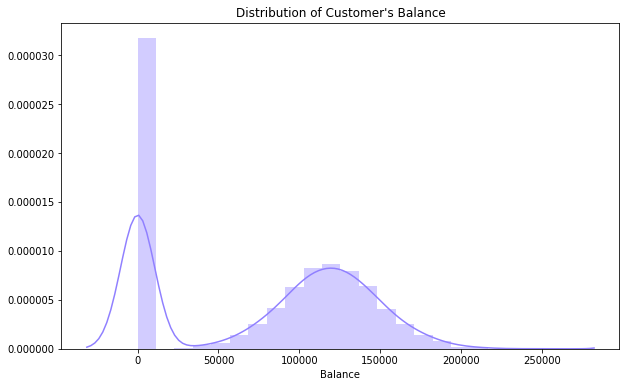

In [99]:
plt.figure(figsize=(10,6))
sns.distplot(df['Balance'], color='#9080ff')
plt.title("Distribution of Customer's Balance");

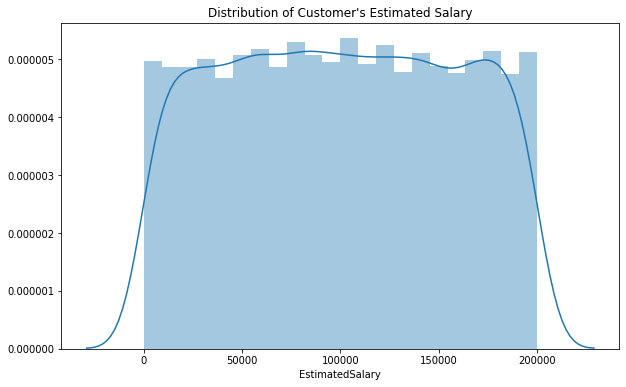

In [95]:
plt.figure(figsize=(10,6))
sns.distplot(df['EstimatedSalary'])
plt.title("Distribution of Customer's Estimated Salary");

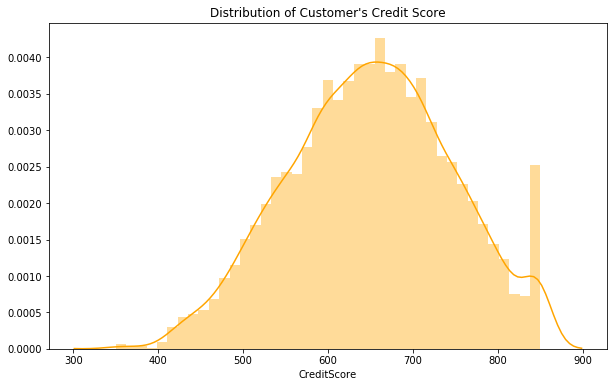

In [102]:
plt.figure(figsize=(10,6))
sns.distplot(df['CreditScore'], color='orange')
plt.title("Distribution of Customer's Credit Score");

#### Multivariate Analysis

In [116]:
# sns.pairplot(df)
# plt.figure(figsize=(18,10));

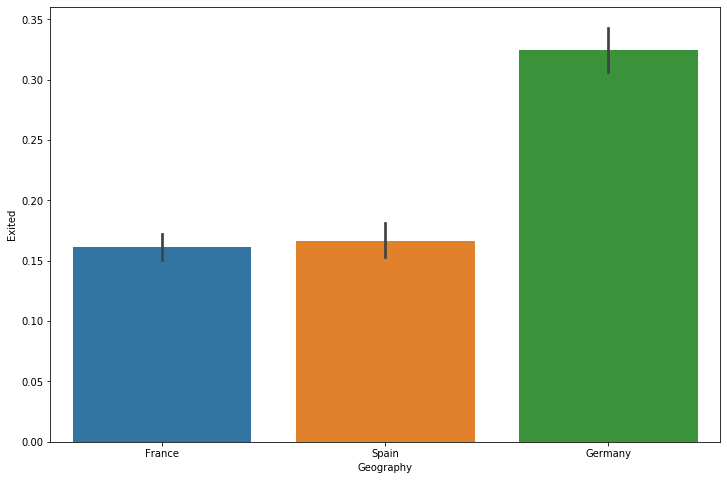

In [208]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='Geography', y='Exited',);
# Germany churn the most dispite lower number in sample

**As expressed earlier Germany has the most Exited xustomers (40%)**

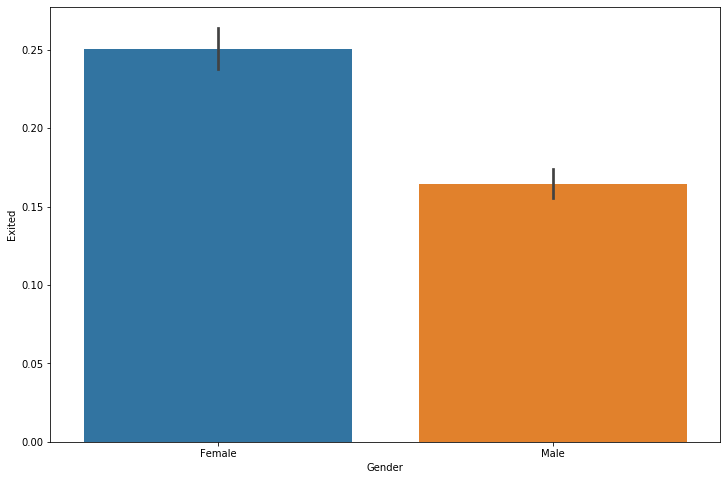

In [211]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='Gender', y='Exited');

**Females Exited more, dispite them having 45.5% of the total sample!**

In [38]:
# df.loc[df['Gender']=='Male'].count()[0]

In [40]:
# Percentage of males who churn
has=df.loc[df['Gender']=='Male'].loc[df['Exited']==1].count()[0]
nt=df.loc[df['Gender']=='Male'].count()[0]
percent = (has/nt)*100
# print(f'{percent.round(0)}% of Males Churn')

**16.0% of Males Exited**

In [46]:
# Percentage of Females who churn
has=df.loc[df['Gender']=='Female'].loc[df['Exited']==1].count()[0]
nt=df.loc[df['Gender']=='Female'].count()[0]
percent = (has/nt)*100
# print(f'{percent.round(0)}% of Females Churn')

**25.0% of Females Exited**

In [48]:
# Percentage of Females who are German
has=df.loc[df['Gender']=='Female'].loc[df['Exited']==1].loc[df['Geography']=='Germany'].count()[0]
nt=df.loc[df['Gender']=='Female'].loc[df['Geography']=='Germany'].count()[0]
percent = (has/nt)*100
# print(f'{percent.round(0)}% of Females from Germany Churn')

**38.0% of Females from Germany Exited**

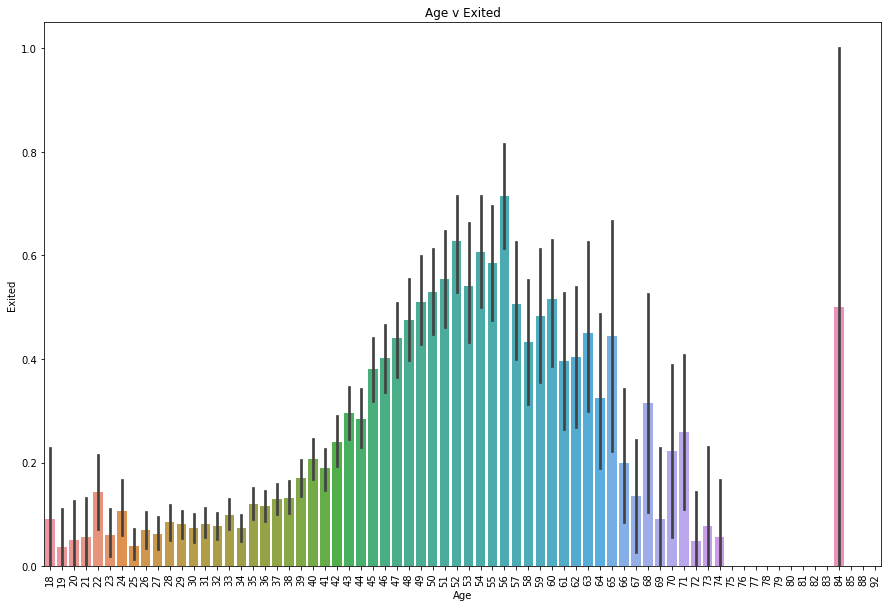

In [144]:
plt.figure(figsize=(15,10))
sns.barplot(data=df, x='Age', y='Exited')
plt.xticks
plt.title("Age v Exited");

**Ages 44 - 65 have the most churn, people older churn less, young people churn the least**

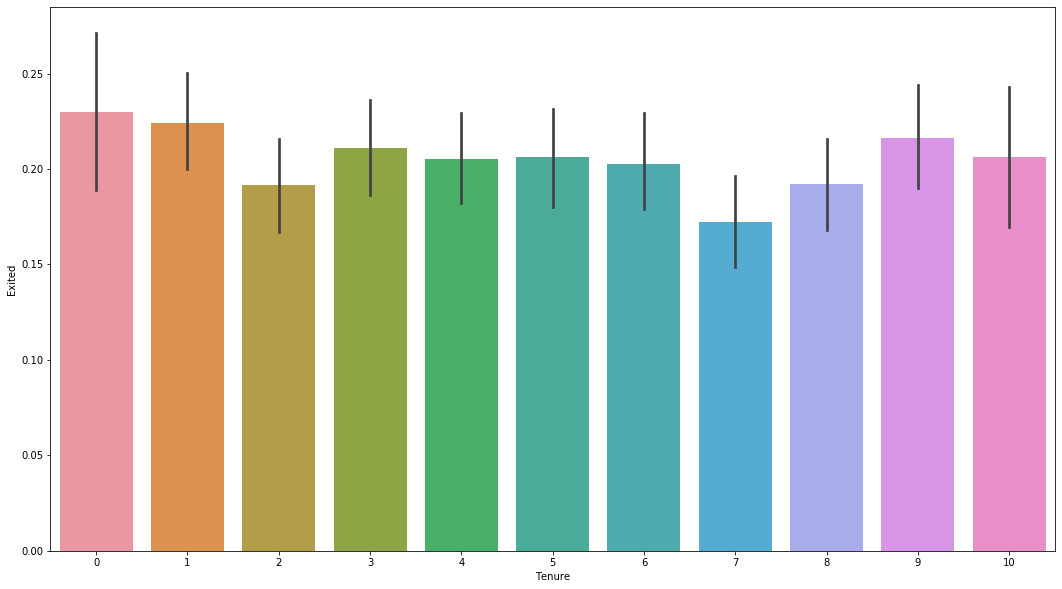

In [54]:
plt.figure(figsize=(18,10))
sns.barplot(data=df, x='Tenure', y='Exited',);

**The Tenure is not a significant reason customers Exit as the data shows no real pattern**

In [37]:
# df.nunique()

In [201]:
# plt.figure(figsize=(15,6))
# plt.xticks(rotation=90)
# sns.barplot(data=df, x='Geography', y='EstimatedSalary', hue='Gender',color='teal');

In [202]:
# plt.figure(figsize=(15,6))
# plt.xticks(rotation=90)
# sns.barplot(data=df, x='Geography', y='CreditScore', hue='Gender',color='#ffa300');

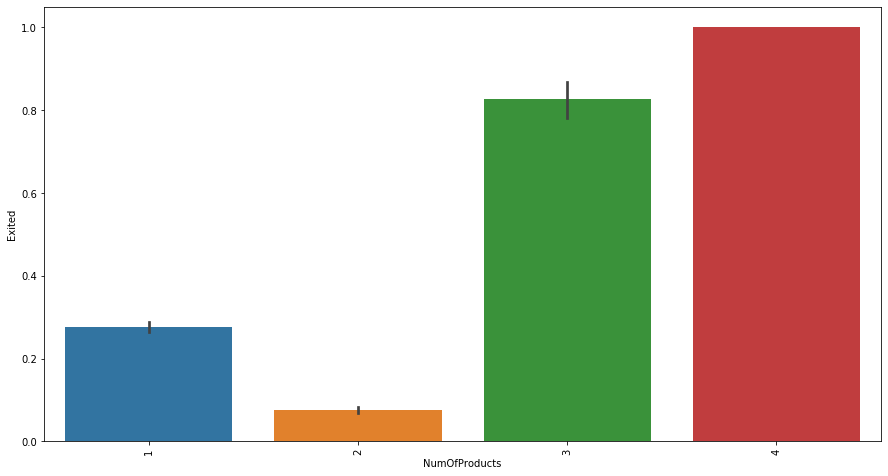

In [36]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(data=df, x='NumOfProducts',y='Exited');

**Customers with more products Exited more than those with less**

In [33]:
# CreditScore v Exited
# plt.figure(figsize=(20,15))
# sns.barplot(data=df, x='CreditScore', y='Exited', units='Gender')
# plt.title('CreditScore v Exited')

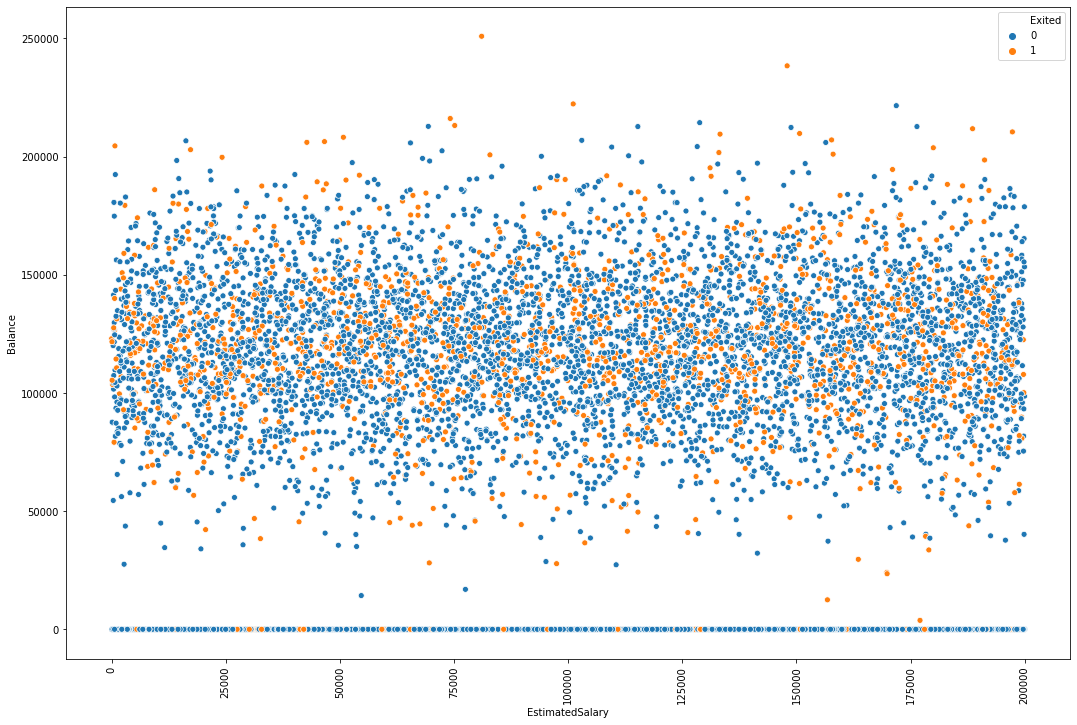

In [200]:
plt.figure(figsize=(18,12))
plt.xticks(rotation=90)
sns.scatterplot(data=df, x='EstimatedSalary', y='Balance', hue='Exited');

Random! No pattern to see here

In [41]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

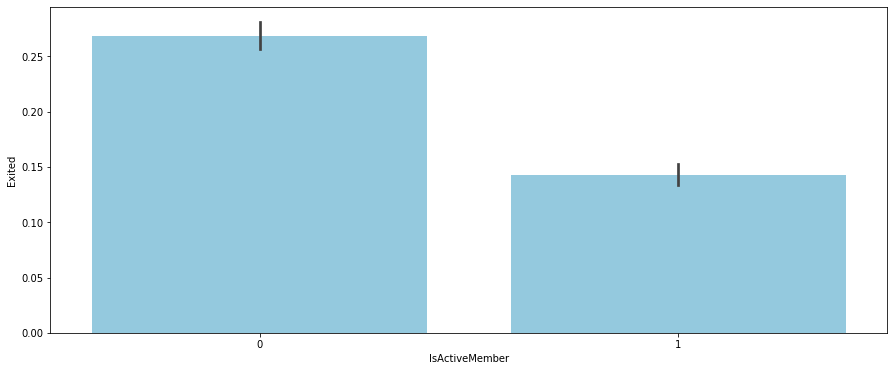

In [49]:
plt.figure(figsize=(15,6))
# plt.xticks(rotation=90)
sns.barplot(data=df, x='IsActiveMember', y='Exited', color='skyblue');

**If a member is not active, he is more likely to Exited**

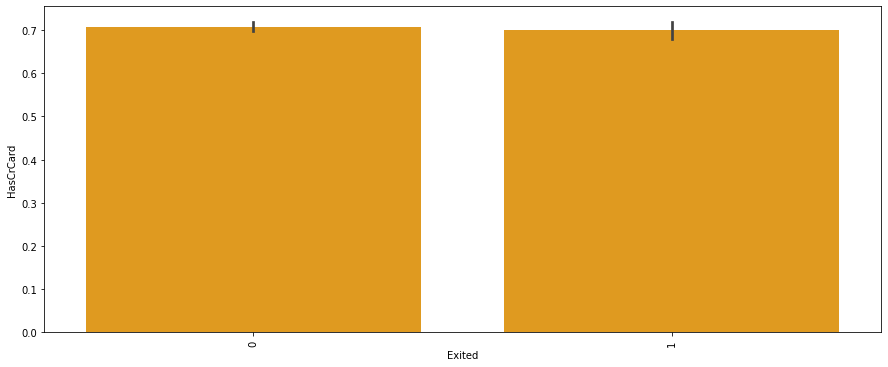

In [50]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.barplot(data=df, x='Exited', y='HasCrCard', color='#ffa300');

In [16]:
# corr = df.corr()*10
# corr
# Plotting Heatmap
# plt.figure(figsize=(15,10))
# sns.heatmap(corr, annot=True)

In [107]:
df['GeographyTest'].unique()

array([1, 3, 2])